

Binary Classifications

---

Minimizing Customer Attrition:

In this chapter, we’ll focus on preventing client attrition. This is an extremely common concern for businesses in every industry,
and one that every company struggles with. It’s especially important since
acquiring new customers is well known to be much more costly than retain-
ing existing ones.

In [ ]:
import pandas as pd
attrition_past=pd.read_csv('https://bradfordtuckfield.com/attrition_past.csv')

print(attrition_past.head())
#The last line of the output tells us that the dataset has five columns.

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  
0       1  
1       0  
2       0  
3       1  
4       1  


The first column is a four-character code for every client.

The second column is lastmonth_activity, a measurement of the number of times someone at that client company accessed our software in the last
month before this data was generated (between 6 and 7 months ago).

The third column is lastyear_activity, the same measurement for the entire
year before the data was generated (between 6 and 18 months ago).

The lastyear_activity column is not visible in the preceding snippet, where
we can see only ellipses between the second and fourth columns.

In [ ]:
# use the pandas option display.max_columns to change the maximum number of columns pandas will display to 6

pd.set_option('display.max_columns', 6)

Plotting Attrition Risk

In [ ]:
print(attrition_past['exited'].mean())

0.5769230769230769


The result we get is about 0.58, meaning that about 58 percent of the
clients in the data exited their contracts in the last six months. This shows
us that attrition is a big problem for the business

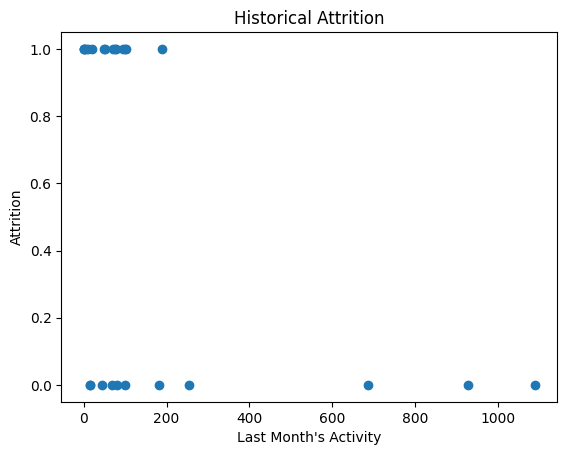

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

On the x-axis, we see last month’s activity, although since the data was
recorded six months ago, it’s really activity from six to seven months ago.
The y-axis shows attrition from our exited variable, and that’s why all values
are 0 (did not exit) or 1 (exited) in the most recent six months. Eyeballing
this figure can give us a basic idea of the relationship between past activity
and future attrition. In particular, the clients with the most activity (> 600)
did not exit their contracts in the six months after their high activity was
recorded. High activity seems to be a predictor of client loyalty, and if it is,
low activity will be a predictor of client attrition.

Confirming Relationships with Linear Regression:

We’ll want to confirm our initial visual impression by performing a
more rigorous quantitative test. In particular, we can use linear regres-
sion. R

We had a cloud of points and used linear regression to find a line that was the best fit to the cloud. Here,
our points don’t look very cloud-like because of the limited range of the
y variable: our “cloud” is two scattered lines at y = 0 and y = 1.

However,
linear regression is a mathematical method from linear algebra, and it
doesn’t care how cloud-like our plot looks. We can perform linear regres-
sion on our attrition data with code that’s almost identical to the code we
used before:

In [ ]:
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In this snippet, we create a variable called regressor, which we then fit to
our data. After fitting our regressor, we can plot our regression line going
through our “cloud” of data, just as we did in Chapter 2:

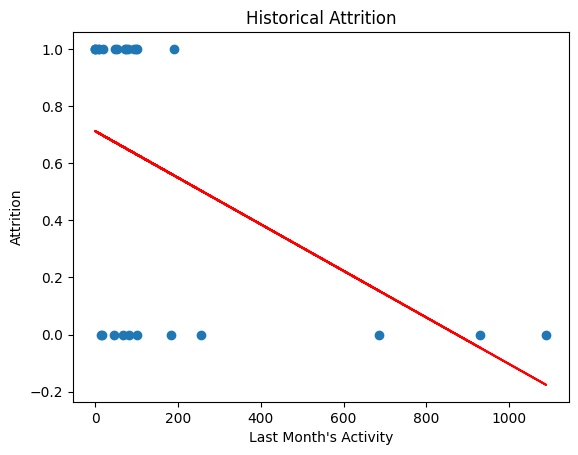

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in \
list(attrition_past['lastmonth_activity'])]
plt.plot(attrition_past['lastmonth_activity'], prediction, color='red')
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

The way to interpret the expected values may not seem
immediately obvious. For example, at x = 400, the y value of the regression
line is about 0.4. This means that the expected value of exited is 0.4, but
that’s not a cogent statement because exited can be only 0.

Can see that our attrition dataset now has six columns. Its new sixth column is the predicted attrition probability for each client based on our regression. Of course, this is
not very useful to us; we don’t need predicted attrition probabilities, since
this is a record of past attrition and we already know with certainty whether
each of these clients exited.

In [ ]:
attrition_past['predicted']=regressor.predict(x)
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  predicted  
0       1   0.648363  
1       0   0.700525  
2       0   0.563600  
3       1   0.629618  
4       1   0.711936  


Predicting the Future:


Let’s download and open more fabricated data. This time, suppose that
all the data was generated today, so its lastmonthactivity column refers to
the previous month, and its lastyearactivity column refers to the 12-month
period ending today. We can read in our data as follows:

In [ ]:
attrition_future=pd.read_csv('http://bradfordtuckfield.com/attrition2.csv')

print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees
0        hhtn                 166               1393                   91
1        slfm                 824              16920                  288
2        pryr                  68                549                   12
3        ahva                 121               1491                   16
4        dmai                   4                 94                    2


You can see that this dataset’s first four columns have the same names
and interpretations as the first four columns of attrition_past. However, this
dataset doesn’t have a fifth, exited column. The dataset lacks this column
because the exited column is supposed to record whether a client exited
their contract in the six-month period after the other columns were gener-
ated. But that six-month period hasn’t happened yet; it’s the six months that
start today. We need to use what we’ve learned from the attrition dataset to
predict the probabilities of attrition for this new set of clients.

We can predict attrition probabilities for the attrition_future dataset in
exactly the same way we predicted attrition probabilities for the attrition_past
dataset, as follows:


In [ ]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['predicted']=regressor.predict(x)

Making Business Recommendations:

After calculating these predicted probabilities, we want to translate them to
business recommendations for our client management team. The simplest
way to direct the team members’ efforts would be to provide them with a
list of high-risk clients to focus their efforts on. We can specify a number
of clients n that we think they have the time and bandwidth to focus on,
and create a list of the top n highest-risk clients. We can do this for n = 5
as follows:

In [ ]:
print(attrition_future.nlargest(5,'predicted'))

#can see that our top five highest-risk clients have predicted
#  probabilities over 0.7 (70 percent), quite a high attrition probability

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
24        pian                   0                 12                   19   
21        bass                   2                 19                 1400   
4         dmai                   4                 94                    2   

    predicted  
8    0.711936  
12   0.711936  
24   0.711936  
21   0.710306  
4    0.708676  


The client managers can start at the beginning of the list and
work their way through it as far as they can get. You can print this list easily
as follows:

In [ ]:
print(list(attrition_future.sort_values(by='predicted',ascending=False).loc[:,'corporation']))

['whsh', 'mike', 'pian', 'bass', 'pevc', 'dmai', 'ynus', 'hlpd', 'kdic', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


The first three corporations in this list—whsh, pian, and mike—are estimated to have the highest attrition risk (highest probability of exiting their
contracts). In this case, the data shows a three-way tie for highest risk, since
all three of these corporations have the same predicted high risk, and all
the other corporations have lower predicted attrition risk.

Finally, you may decide that you’re interested in any clients whose pre-
dicted probabilities are higher than a certain threshold x. We can do this as
follows for x = 0.7:

In [ ]:
print(list(attrition_future.loc[attrition_future['predicted']>0.7,'corporation']))

['dmai', 'whsh', 'oscr', 'kdic', 'mike', 'pevc', 'erin', 'angl', 'bass', 'ynus', 'pian', 'hlpd']


Measuring Prediction Accuracy:

The first thing we’ll need to do
is create lists of our predictions and actual values, respectively:

In this snippet, we calculate the median value of our predicted column.
Then we create prediction, which will be 0 when our LPM predicts below-
median probability, and 1 when our LPM predicts above-median probability.

In [ ]:
themedian=attrition_past['predicted'].median()
prediction=list(1*(attrition_past['predicted']>themedian))
actual=list(attrition_past['exited'])

Now that our data is in the right format, we can create a confusion matrix,
a standard way to measure accuracy in classification models:

Every confusion matrix has the following structure:

    [[true positives false positives]
    [false negatives true negatives]]

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction,actual))

[[7 6]
 [4 9]]


we find that our model
made seven true-positive classifications: for seven corporations, our
model predicted above-median exit probability (high attrition risk),
and those seven corporations did exit. Our false positives are six cases
in which we predicted above-median exit probability but the corporation didn’t exit. Our false negatives are four cases in which we predicted
below-median exit probability but the corporation did exit. Finally, our
true negatives are nine cases in which we predicted below-median exit
probability for clients that didn’t exit.

We can calculate both precision and recall as follows:

You’ll see that our precision is about 0.54, and our recall is about 0.64.
These are not extremely encouraging values. Precision and recall are always
between 0 and 1, and they’re supposed to be as close to 1 as possible. Our
results are higher than 0, which is good news, but we have plenty of room
for improvement.

In [ ]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

print(conf_mat)
print(precision)
print(recall)

[[7 6]
 [4 9]]
0.5384615384615384
0.6363636363636364


Using Multivariate LPMs

Instead of trying to discover attrition risk through plotting and intuition,
we can run a multivariate regression with the predictors we’re interested in:

In [ ]:
x3 = attrition_past.loc[:,['lastmonth_activity', 'lastyear_activity',\
'number_of_employees']].values.reshape(-1,3)
y = attrition_past['exited'].values.reshape(-1,1)
regressor_multi = LinearRegression()
regressor_multi.fit(x3, y)

LinearRegression()

This is a multivariate linear regression, just like the multivariate linear
regressions we introduced in Chapter 2. Since we’re running it to predict
0–1 data, it’s a multivariate linear probability model.

In [ ]:
attrition_future['predicted_multi']=regressor_multi.predict(x3)
print(attrition_future.nlargest(5,'predicted_multi'))

#we can see the five corporations with the highest predicted attrition risk,
#  based on this new multivariate regressor.

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   

    predicted  predicted_multi  
11   0.634508         0.870000  
12   0.711936         0.815677  
13   0.708676         0.788110  
4    0.708676         0.755625  
22   0.704600         0.715362  


Let’s look at a list of all corporations, sorted by highest attrition risk to
lowest risk based on this most recent regression:

These are the same corporations we saw before, but they’re in a different order, since their attrition risk was predicted using regressor_multi
instead of regressor.

In [ ]:
print(list(attrition_future.sort_values(by='predicted_multi',\
ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


Creating New Metrics

fter running a regression that uses all the numeric predictors in the dataset, you may think that we’ve done all the regression that’s possible. But we
can do more, because we’re not strictly limited to creating LPMs based on
the columns of our attrition dataset in their raw form. We can also create a
derived feature, or engineered feature—a feature or metric created by transforming and combining existing variables. The following is an example of a
derived feature:

In [ ]:
attrition_future['activity_per_employee']=attrition_future.loc[:,\
'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']

This is simply
the last month’s activity for the whole corporation divided by the number
of employees at the corporation. This new derived metric could be a better
predictor of attrition risk than the raw activity level or the raw number of
employees alone.

Even though both companies have the same level of activity according to our raw measurement, the smaller company seems to have a lower likelihood of attrition because our
tool appears to be much more important to the work of each of its employees,
on average. We can use this new activity_per_employee metric in a regression
that’s just like all the regressions we’ve done before:

In [ ]:
attrition_past['activity_per_employee']=attrition_past.loc[:,\
'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']
x = attrition_past.loc[:,['activity_per_employee','lastmonth_activity',\
'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
y = attrition_past['exited'].values.reshape(-1,1)
regressor_derived= LinearRegression()
regressor_derived.fit(x, y)
attrition_past['predicted3']=regressor_derived.predict(x)
x = attrition_future.loc[:,['activity_per_employee','lastmonth_activity',\
'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
attrition_future['predicted3']=regressor_derived.predict(x)

First, we define the activity_per_employee metric,
our new derived feature.

Then, we define our x and y variables. The x variable will be our features: the four variables we’ll use to predict attrition.

The y variable will be our target: the one variable we’re trying to predict.

we can look at the predictions made by this model:

You’ll see that the order is different from the order given by the
previous regressors we tried:

In [ ]:
print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


Just as we did before, we can check the confusion matrix for our latest
model. First, we’ll put our predictions and actual values in the correct 0–1
format:

In [ ]:
themedian=attrition_past['predicted3'].median()
prediction=list(1*(attrition_past['predicted3']>themedian))
actual=list(attrition_past['exited'])

#calculate our latest confusion matrix:
print(confusion_matrix(prediction,actual))

[[ 9  4]
 [ 2 11]]


This confusion matrix should immediately look better to you than our
previous confusion matrix. If you need more evidence that our latest model
is better, look at the precision and recall values for this model:

In [ ]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

# our precision is about 0.69,
# recall is about 0.82— still not perfect,
#  but big improvements on our previous, lower values.

print(conf_mat)
print(precision)
print(recall)

[[ 9  4]
 [ 2 11]]
0.6923076923076923
0.8181818181818182


Considering the Weaknesses of LPMs

LPMs have good points: it’s easy to interpret their values, it’s easy to estimate them with centuries-old methods and many useful Python modules,
and they’re simple in a way only a straight line can be. However, LPMs
also have weaknesses. One is that they don’t fit the points of a dataset well:
they pass through the middle of the points and get close to only a few
points.

Predicting Binary Outcomes with Logistic Regression

We need a method for binary classification that is not subject to the weaknesses of LPMs. If you think about Figure 5-2, you’ll realize that whatever
method we use can’t rely on fitting straight lines to points, since any straight
line besides a perfectly flat horizontal line will inevitably make predictions
that are higher than 100 percent or lower than 0 percent. Any straight line
will also be far from many of the points it’s trying to fit. If we’re going to
fit a line to points to do binary classification, it will have to be a curve that
doesn’t go below 0 or above 1, and that also gets close to many of the points
(which are all at y = 0 or y = 1).


Drawing Logistic Curves:

The logistic curve has an S-like shape, so it stays close to y = 0 and y = 1
over most of its domain. Also, it never goes above 1 and never goes below 0,
so it resolves the weaknesses of LPMs.

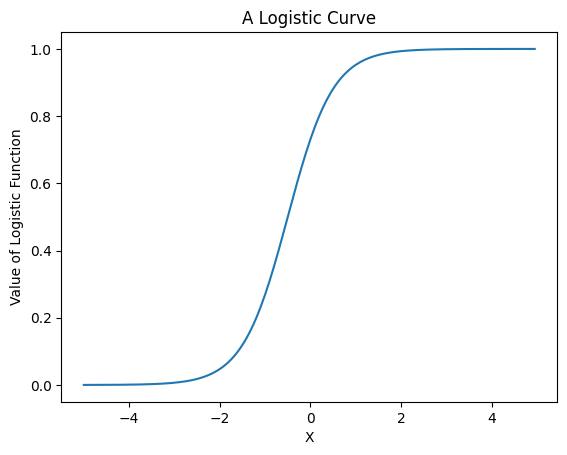

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

If we change the coefficients in our logistic equation to be positive
instead of negative, we reverse the direction of the logistic curve, so it’s a
backward S instead of a standard S:

his code snippet is the same as the previous code snippet, except for
the change of two numbers from negative to positive (shown in bold).

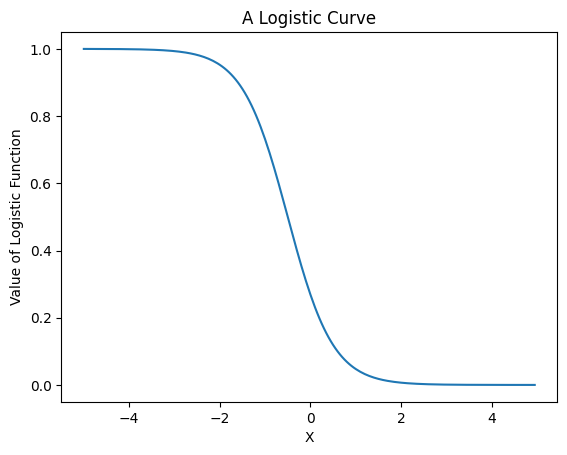

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

Fitting the Logistic Function to Our Data:

We can fit a logistic curve to binary data in much the same way that we fit
a straight line to binary data when we created our LPM. Fitting a logistic
curve to binary data is also called performing logistic regression, and it’s a
common, standard alternative to linear regression for binary classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

After we fit the model, we can access predicted probabilities for each
element as follows:

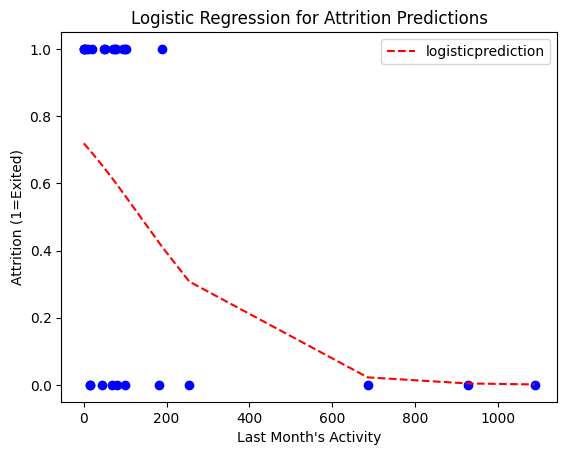

In [ ]:
attrition_past['logisticprediction']=model.predict_proba(x)[:,1]

# Plot:

fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity',\
'logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

We have exactly what we wanted: a regression that never predicts above 100 percent or below 0 percent
probability and gets very close to some of the points in our strange “cloud.”
We’ve resolved the weaknesses of LPMs with this new method.

Just as we did with other regressions, we can look at the predictions our
logistic regression makes. In particular, we can predict the probabilities of
attrition for every company in our attrition2 dataset and print them out in
order from highest to lowest attrition risk:

You can look at these results and compare them to the predictions from
our other regressions.

In [ ]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction',\
ascending=False).loc[:,'corporation']))

['whsh', 'mike', 'pian', 'bass', 'pevc', 'dmai', 'ynus', 'hlpd', 'kdic', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


Applications of Binary Classification:

Logistic regressions and LPMs are commonly used to predict binary out-
comes. We can use them not only for attrition prediction but also for
predicting whether a stock will go up, whether an applicant will be success-
ful in a job, whether a project will be profitable, whether a team will win a
game, or any other binary classification that can be expressed in a true/
false, 0/1 framework.

---
Summary:
---

In this chapter, we discussed binary classification. We started with a
simple business scenario and showed how linear regression can enable
us to predict probabilities that help solve a business problem. We consid-
ered the weaknesses of those linear probability models and introduced
logistic regression as a more complex model that overcomes those weak-
nesses. Binary classification may seem like an unimportant topic, but we
can use it for analyzing risk, predicting the future, and making difficult
yes/no decisions. In our discussion of machine learning in the next chap-
ter, we’ll discuss prediction and classification methods that go beyond
regressions.

1. Minimizing Customer Attrition

2. Using Linear Probability Models to Find High-Risk Customers

3. Plotting Attrition Risk

4. Confirming Relationships with Linear Regression

5. Predicting the Future

6. Making Business Recommendations

7. Measuring Prediction Accuracy

8. Using Multivariate LPMs

9. Creating New Metrics

10. Considering the Weaknesses of LPMs

11. Predicting Binary Outcomes with Logistic Regression

12. Drawing Logistic Curves

13. Fitting the Logistic Function to Our Data

14. Applications of Binary Classification

---